# Salaries pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
sal_21_22 = pd.read_csv('DB_Salaries_21_22.csv').set_index('Unnamed: 0')
sal_20_21 = pd.read_csv('DB_Salaries_20_21.csv').set_index('Unnamed: 0')
sal_19_20 = pd.read_csv('DB_Salaries_19_20.csv').set_index('Unnamed: 0')
sal_18_19 = pd.read_csv('DB_Salaries_18_19.csv').set_index('Unnamed: 0')
sal_17_18 = pd.read_csv('DB_Salaries_17_18.csv').set_index('Unnamed: 0')

In [3]:
sal_21_22

,Player,Team,Annual Salary
Unnamed: 0,,,
0,"Stephen Curry, PG",Golden State Warriors,"$45,780,966"
1,"James Harden, SG",Philadelphia 76ers,"$44,310,840"
2,"John Wall, PG",Houston Rockets,"$44,310,840"
3,"Russell Westbrook, PG",Los Angeles Lakers,"$44,211,146"
4,"Kevin Durant, PF",Brooklyn Nets,"$42,018,900"
...,...,...,...
496,"Juwan Morgan, F",Toronto Raptors,"$19,816"
497,"Moses Brown, C",Cleveland Cavaliers,"$19,186"
498,"Xavier Sneed, F",Utah Jazz,"$8,558"


In [4]:
sal_21_22['Year'] = 2022
sal_20_21['Year'] = 2021
sal_19_20['Year'] = 2020
sal_18_19['Year'] = 2019
sal_17_18['Year'] = 2018

In [5]:
sal = pd.concat([sal_21_22, sal_20_21, sal_19_20, sal_18_19, sal_17_18])
sal.reset_index()

,Unnamed: 0,Player,Team,Annual Salary,Year
0,0,"Stephen Curry, PG",Golden State Warriors,"$45,780,966",2022
1,1,"James Harden, SG",Philadelphia 76ers,"$44,310,840",2022
2,2,"John Wall, PG",Houston Rockets,"$44,310,840",2022
3,3,"Russell Westbrook, PG",Los Angeles Lakers,"$44,211,146",2022
4,4,"Kevin Durant, PF",Brooklyn Nets,"$42,018,900",2022
...,...,...,...,...,...
2680,584,"Marquis Teague, G",Boston Celtics,"$74,186",2018
2681,585,"Mike Tobey, C",Dallas Mavericks,"$67,135",2018
2682,586,"MarShon Brooks, G",Los Angeles Lakers,"$60,283",2018
2683,587,"Jordan Crawford, G",Houston Rockets,"$58,190",2018


In [6]:
sal[['Player','Position']] = sal.Player.str.rsplit(',', 1, expand = True,)

In [7]:
sal.drop(['Position'], axis = 1, inplace = True)

In [8]:
sal

,Player,Team,Annual Salary,Year
Unnamed: 0,,,,
0,Stephen Curry,Golden State Warriors,"$45,780,966",2022
1,James Harden,Philadelphia 76ers,"$44,310,840",2022
2,John Wall,Houston Rockets,"$44,310,840",2022
3,Russell Westbrook,Los Angeles Lakers,"$44,211,146",2022
4,Kevin Durant,Brooklyn Nets,"$42,018,900",2022
...,...,...,...,...
584,Marquis Teague,Boston Celtics,"$74,186",2018
585,Mike Tobey,Dallas Mavericks,"$67,135",2018
586,MarShon Brooks,Los Angeles Lakers,"$60,283",2018


Stats pre-processing

In [9]:
stats = pd.read_csv('Player_Stats/Player_Stats.csv')

In [10]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18885 non-null  int64 
 1   Rk          18885 non-null  object
 2   Player      18885 non-null  object
 3   Pos         18885 non-null  object
 4   Age         18885 non-null  object
 5   Tm          18885 non-null  object
 6   G           18885 non-null  object
 7   GS          18885 non-null  object
 8   MP          18885 non-null  object
 9   FG          18885 non-null  object
 10  FGA         18885 non-null  object
 11  FG%         18779 non-null  object
 12  3P          18885 non-null  object
 13  3PA         18885 non-null  object
 14  3P%         16029 non-null  object
 15  2P          18885 non-null  object
 16  2PA         18885 non-null  object
 17  2P%         18709 non-null  object
 18  eFG%        18779 non-null  object
 19  FT          18885 non-null  object
 20  FTA   

In [11]:
stats_new = stats[stats['Year'].isin([2018, 2019, 2020, 2021, 2022])]

In [12]:
import unidecode
lst = []

for i in stats_new['Player']:
    temp = unidecode.unidecode(i)
    lst.append(temp)

In [13]:
stats_new['Player_uni'] = lst

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
stats_new

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni
15216,0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines
15217,1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy
15218,2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams
15219,3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo
15220,4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young
18881,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young
18882,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven
18883,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller


In [15]:
stats_new.reset_index(inplace = True)

In [16]:
stats_new.drop(columns = ['index', 'Unnamed: 0'], inplace = True)

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
stats_new

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young
3665,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young
3666,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven
3667,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller


Merge

In [18]:
df = stats_new.merge(sal, how = 'left', left_on = ['Player_uni', 'Year'], right_on = ['Player', 'Year'])

In [19]:
df.drop('Team', axis = 1, inplace = True)

In [20]:
df

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines,Alex Abrines,"$5,725,000"
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams,Steven Adams,"$22,471,910"
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo,Bam Adebayo,"$2,955,840"
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young,Thaddeus Young,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young,Trae Young,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven,Omer Yurtseven,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller,NaN,NaN


In [21]:
df[df['Annual Salary'].isna()]['G'].value_counts()

G     129
2      59
1      58
3      52
4      45
     ... 
67      1
35      1
45      1
72      1
61      1
Name: G, Length: 77, dtype: int64

In [22]:
df.drop(df[df['G'] == 'G'].index, inplace = True)

In [23]:
df[df['G'] == 'G']

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [24]:
df[df['Annual Salary'].isna()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.7,0.2,0.1,0.5,0.8,1.1,2018,Kadeem Allen,NaN,NaN
18,19,Ryan Arcidiacono,PG,23,CHI,24,0,12.7,0.7,1.7,...,1.5,0.5,0.0,0.5,0.8,2.0,2018,Ryan Arcidiacono,NaN,NaN
21,22,Jamel Artis,SG,25,ORL,15,1,18.6,2.1,5.3,...,1.2,0.1,0.2,0.5,0.7,5.1,2018,Jamel Artis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,599,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1.0,...,0.5,0.0,0.3,0.0,0.0,1.3,2022,Moses Wright,NaN,NaN
3661,599,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2022,Moses Wright,NaN,NaN
3662,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,0.3,0.0,0.3,0.0,0.0,1.7,2022,Moses Wright,NaN,NaN
3663,600,Gabe York,SG,28,IND,2,0,10.5,1.0,3.5,...,2.0,1.0,0.5,0.5,2.0,4.0,2022,Gabe York,NaN,NaN


In [25]:
df_18 = df[(df['Year'] == 2018)]

In [26]:
df_18.drop(df_18[df_18['Player_uni'].duplicated()].index, inplace = True)

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_18[df_18['Annual Salary'].isna()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.7,0.2,0.1,0.5,0.8,1.1,2018,Kadeem Allen,NaN,NaN
18,19,Ryan Arcidiacono,PG,23,CHI,24,0,12.7,0.7,1.7,...,1.5,0.5,0.0,0.5,0.8,2.0,2018,Ryan Arcidiacono,NaN,NaN
21,22,Jamel Artis,SG,25,ORL,15,1,18.6,2.1,5.3,...,1.2,0.1,0.2,0.5,0.7,5.1,2018,Jamel Artis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.0,0.0,0.0,0.3,0.3,1.7,2018,Matt Williams,NaN,NaN
669,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,0.7,0.3,0.5,0.5,2.3,7.0,2018,Jamil Wilson,NaN,NaN
672,528,Nate Wolters,PG,26,UTA,5,0,3.8,0.2,1.2,...,0.2,0.0,0.0,0.0,0.2,0.4,2018,Nate Wolters,NaN,NaN
678,532,James Young,SG,22,PHI,6,0,10.2,0.8,2.3,...,0.3,0.0,0.0,0.2,0.7,2.8,2018,James Young,NaN,NaN


In [28]:
df_19 = df[(df['Year'] == 2019)]
df_19.drop(df_19[df_19['Player_uni'].duplicated()].index, inplace = True)


/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_19[df_19['Player_uni'].duplicated()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [30]:
df_20 = df[(df['Year'] == 2020)]
df_20.drop(df_20[df_20['Player_uni'].duplicated()].index, inplace = True)

df_21 = df[(df['Year'] == 2021)]
df_21.drop(df_21[df_21['Player_uni'].duplicated()].index, inplace = True)

df_22 = df[(df['Year'] == 2022)]
df_22.drop(df_22[df_22['Player_uni'].duplicated()].index, inplace = True)

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df_22[df_22['Player_uni'].duplicated()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [32]:
stat = pd.concat([df_19, df_20, df_21, df_22])

In [33]:
stat['G'] = stat['G'].astype(int)
stat['PTS'] = stat['PTS'].astype(float)

In [34]:
stat[stat['Player_uni'] == 'Kevin Durant']

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
886,150,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,...,5.9,0.7,1.1,2.9,2.0,26.0,2019,Kevin Durant,Kevin Durant,"$30,000,000"
2286,140,Kevin Durant,PF,32,BRK,35,32,33.1,9.3,17.2,...,5.6,0.7,1.3,3.4,2.0,26.9,2021,Kevin Durant,Kevin Durant,"$40,108,950"
3035,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,6.4,0.9,0.9,3.5,2.1,29.9,2022,Kevin Durant,Kevin Durant,"$42,018,900"


In [35]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.6,0.5,0.2,0.5,1.7,5.3,2019,Alex Abrines,Alex Abrines,"$5,455,236"
690,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.8,0.1,0.4,0.4,2.4,1.7,2019,Quincy Acy,NaN,NaN
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.9,0.4,0.1,0.8,1.3,3.2,2019,Jaylen Adams,Jaylen Adams,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,1.6,1.5,1.0,1.7,2.6,13.9,2019,Steven Adams,Steven Adams,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,2.2,0.9,0.8,1.5,2.5,8.9,2019,Bam Adebayo,Bam Adebayo,"$2,955,840"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.0,1.0,0.3,1.0,1.6,6.2,2022,Thaddeus Young,Thaddeus Young,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young,Trae Young,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven,Omer Yurtseven,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller,NaN,NaN


In [36]:
stat.drop(stat[(stat['Annual Salary'].isna()) & (stat['G'] <= 16)].index, inplace = True) #drop on players that have played less than 20 % of the games

In [37]:
stat[(stat['Annual Salary'].isna()) & (stat['PTS'] >= 10)]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1077,285,Kevin Knox,PF,19,NYK,75,57,28.8,4.5,12.2,...,1.1,0.6,0.3,1.5,2.3,12.8,2019,Kevin Knox,NaN,NaN
1187,361,Marcus Morris,PF,29,BOS,75,53,27.9,5.0,11.3,...,1.5,0.6,0.3,1.2,2.4,13.9,2019,Marcus Morris,NaN,NaN
1264,418,J.J. Redick,SG,34,PHI,76,63,31.3,5.9,13.5,...,2.7,0.4,0.2,1.3,1.7,18.1,2019,J.J. Redick,NaN,NaN
1871,351,Marcus Morris,SF-PF,30,TOT,62,62,31.2,5.7,13.1,...,1.4,0.8,0.5,1.6,2.9,16.7,2020,Marcus Morris,NaN,NaN
1952,419,J.J. Redick,SG,35,NOP,60,36,26.4,4.8,10.5,...,2.0,0.3,0.2,1.3,1.6,15.3,2020,J.J. Redick,NaN,NaN
2190,70,Armoni Brooks,SG,22,HOU,20,5,26.0,3.9,9.6,...,1.5,0.6,0.3,1.1,1.7,11.2,2021,Armoni Brooks,NaN,NaN
2573,354,Marcus Morris,PF,31,LAC,57,29,26.4,4.8,10.2,...,1.0,0.6,0.3,1.0,2.1,13.4,2021,Marcus Morris,NaN,NaN
3380,393,Marcus Morris,PF,32,LAC,54,54,29.0,5.6,12.8,...,2.1,0.5,0.3,1.3,2.1,15.4,2022,Marcus Morris,NaN,NaN
3643,584,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,...,3.9,1.0,0.4,2.4,2.2,12.9,2022,Brandon Williams,NaN,NaN
3648,589,Robert Williams,C,24,BOS,61,61,29.6,4.4,6.0,...,2.0,0.9,2.2,1.0,2.2,10.0,2022,Robert Williams,NaN,NaN


In [38]:
stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2019)] = '$12,500,000'

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2020)] = '$13,486,300'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2019)] = '$15,000,000'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2020)] = '$15,000,000'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2021)] = '$14,883,721'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2022)] = '$15,627,907'
stat['Annual Salary'][(stat['Player_uni'] == 'Kevin Knox') & (stat['Year'] == 2019)] = '$3,739,920'
stat['Annual Salary'][(stat['Player_uni'] == 'Robert Williams') & (stat['Year'] == 2022)] = '$3,661,976'

# manualy imputed annual salaries from players that had 12 pts or higher because it was detected that when merging both datasets, the name was different (Sr. or JJ question)

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thi

In [40]:
stat.drop(columns = ['Player_uni', 'Player_y'], inplace = True)

In [41]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019,"$5,455,236"
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019,"$2,955,840"
694,6,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,...,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,2022,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,NaN


In [42]:
stat.drop(stat[stat['Annual Salary'].isna()].index, inplace = True)

In [43]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019,"$5,455,236"
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019,"$2,955,840"
696,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,2019,"$22,347,015"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,597,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,...,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,2022,"$8,526,316"
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,2022,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,"$1,489,065"


In [44]:
stat['Pos'].value_counts() # count per position
stat[stat['Pos']=='SG-SF']

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
1310,450,Jonathon Simmons,SG-SF,29,TOT,56,9,19.0,2.4,6.3,...,1.8,2.3,2.3,0.5,0.3,1.2,1.6,6.5,2019,"$6,000,000"
1574,115,Allen Crabbe,SG-SF,27,TOT,37,1,17.6,1.7,4.8,...,1.8,2.1,0.9,0.4,0.1,0.5,1.3,4.6,2020,"$18,500,000"
2266,126,Hamidou Diallo,SG-SF,22,TOT,52,9,23.6,4.3,9.0,...,4.1,5.2,1.9,0.8,0.5,1.5,2.6,11.6,2021,"$1,663,861"
2651,415,Norman Powell,SG-SF,27,TOT,69,58,32.0,6.3,13.3,...,2.5,3.1,1.9,1.2,0.3,1.7,2.3,18.6,2021,"$10,865,952"
3135,226,Josh Hart,SG-SF,26,TOT,54,53,33.2,5.3,10.5,...,6.0,7.2,4.1,1.1,0.2,2.1,2.8,14.9,2022,"$12,000,000"
3185,257,Elijah Hughes,SG-SF,23,TOT,36,4,12.1,1.3,4.0,...,1.4,1.6,0.6,0.4,0.2,0.5,1.1,3.5,2022,"$1,517,981"
3304,338,Didi Louzada,SG-SF,22,TOT,9,1,14.3,1.3,3.7,...,1.3,1.9,0.6,0.2,0.2,0.6,1.4,3.9,2022,"$1,786,878"
3553,518,Lance Stephenson,SG-SF,31,TOT,46,1,17.7,3.2,7.0,...,2.5,2.8,3.6,0.5,0.1,1.6,2.1,8.3,2022,"$642,729"


In [45]:
stat['Annual Salary'] = stat['Annual Salary'].apply(lambda x: x.replace(',',''))
stat['Annual Salary'] = stat['Annual Salary'].apply(lambda x: x.replace('$',''))

In [46]:
# dividing the player into macro positions Guard, Forward and Center
stat.loc[stat['Pos'].isin(['PG', 'SG', 'PG-SG', 'SG-PG', 'SG-SF', 'SG-PF']), 'Pos'] = 'Guard'
stat.loc[stat['Pos'].isin(['PF', 'SF', 'SF-SG', 'PF-SF', 'PF-C', 'SF-PF', 'SF-C']), 'Pos'] = 'Forward'
stat.loc[stat['Pos'].isin(['C', 'C-PF']), 'Pos'] = 'Center'
stat['Pos'].value_counts()

Guard      751
Forward    719
Center     363
Name: Pos, dtype: int64

In [47]:
stat.dtypes

Rk                object
Player_x          object
Pos               object
Age               object
Tm                object
G                  int64
GS                object
MP                object
FG                object
FGA               object
FG%               object
3P                object
3PA               object
3P%               object
2P                object
2PA               object
2P%               object
eFG%              object
FT                object
FTA               object
FT%               object
ORB               object
DRB               object
TRB               object
AST               object
STL               object
BLK               object
TOV               object
PF                object
PTS              float64
Year               int64
Annual Salary     object
dtype: object

In [48]:
columns = stat.columns.values.tolist() # transforming the data type of the columns to float
for i in columns[5:]:
    stat[i] = stat[i].astype('float64')

stat['Age'] = stat['Age'].astype('float64')
stat['Player_x'] = stat['Player_x'].astype('str')

In [49]:
stat.dtypes

Rk                object
Player_x          object
Pos               object
Age              float64
Tm                object
G                float64
GS               float64
MP               float64
FG               float64
FGA              float64
FG%              float64
3P               float64
3PA              float64
3P%              float64
2P               float64
2PA              float64
2P%              float64
eFG%             float64
FT               float64
FTA              float64
FT%              float64
ORB              float64
DRB              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
Year             float64
Annual Salary    float64
dtype: object

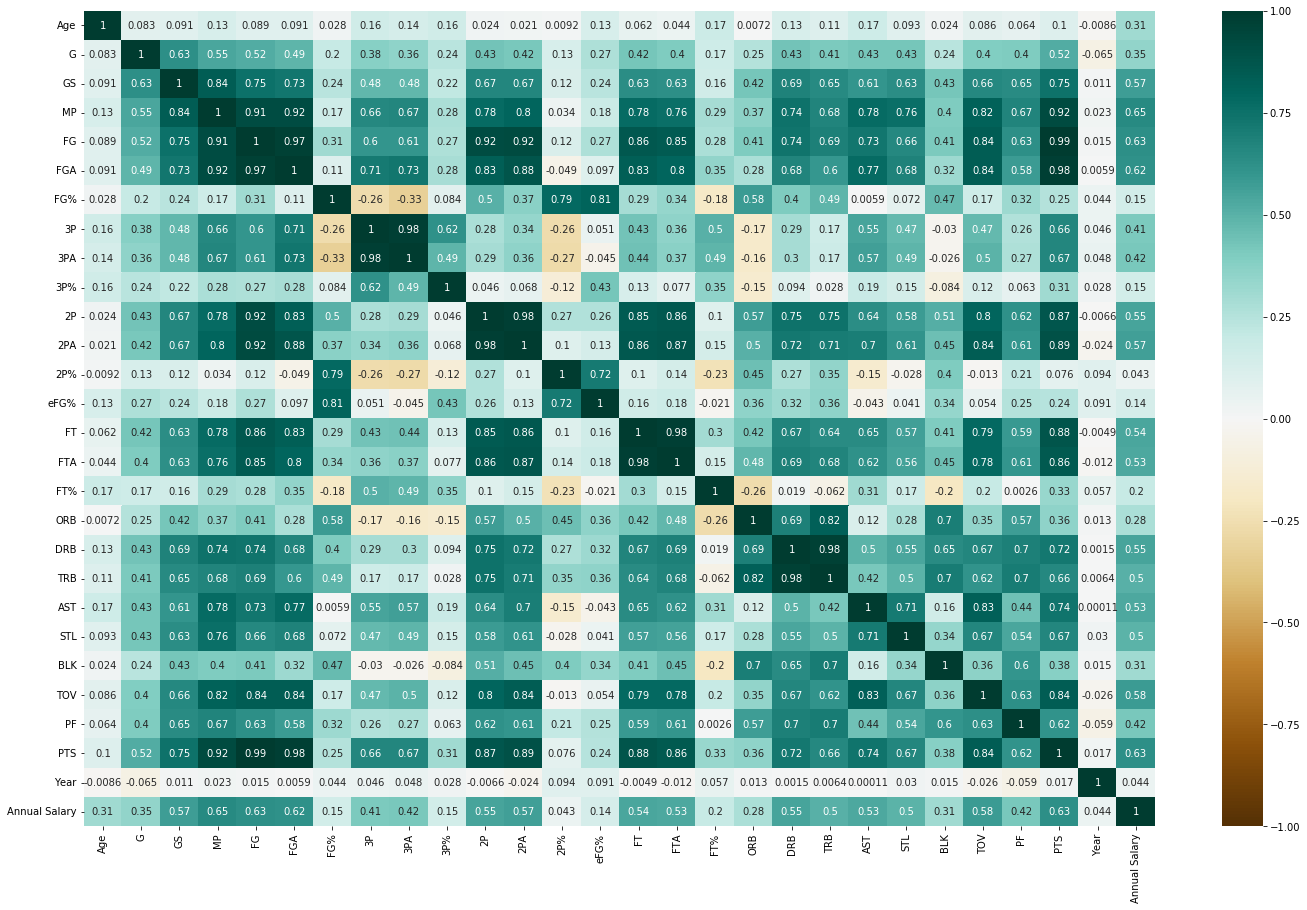

In [50]:
cluster_corr = stat.corr(method = 'spearman') 
## Correlation matrix
figure = plt.figure(figsize = (24,15)) 
sns.heatmap(cluster_corr, annot=True, fmt = '.2g',vmin=-1, vmax=1, cmap='BrBG')
## definir casas decimais 

In [51]:
stat.drop('2P', axis = 1, inplace = True) # remove 2 point attempts
stat.drop('3P', axis = 1, inplace = True) # remove 3 point attempts
stat.drop('FG', axis = 1, inplace = True) # remove Field Goal attempts
stat.drop('FT', axis = 1, inplace = True) # remove FT attempts
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
689,1,Álex Abrines,Guard,25.0,OKC,31.0,2.0,19.0,5.1,0.357,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019.0,5455236.0
691,3,Jaylen Adams,Guard,22.0,ATL,34.0,1.0,12.6,3.2,0.345,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019.0,270014.0
692,4,Steven Adams,Center,25.0,OKC,80.0,80.0,33.4,10.1,0.595,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019.0,24157303.0
693,5,Bam Adebayo,Center,21.0,MIA,82.0,28.0,23.3,5.9,0.576,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019.0,2955840.0
696,8,LaMarcus Aldridge,Center,33.0,SAS,81.0,81.0,33.2,16.3,0.519,...,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,2019.0,22347015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,597,Delon Wright,Guard,29.0,ATL,77.0,8.0,18.9,3.5,0.454,...,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,2022.0,8526316.0
3665,601,Thaddeus Young,Forward,33.0,TOT,52.0,1.0,16.3,5.2,0.518,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,2022.0,14190000.0
3668,602,Trae Young,Guard,23.0,ATL,76.0,76.0,34.9,20.3,0.460,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022.0,8326471.0
3669,603,Omer Yurtseven,Center,23.0,MIA,56.0,12.0,12.6,4.4,0.526,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022.0,1489065.0


In [52]:
stat['Annual Salary'] = stat['Annual Salary'] / 1000

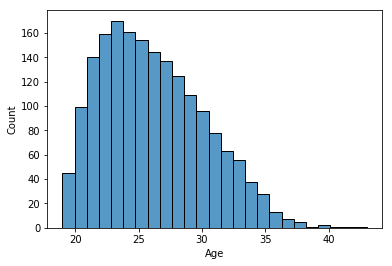

In [53]:
sns.histplot(data = stat['Age'])

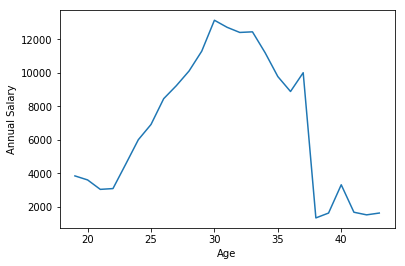

In [54]:
sns.lineplot(data = stat.groupby('Age')['Annual Salary'].mean())

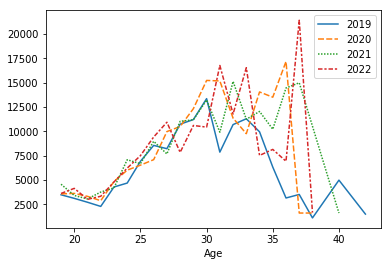

In [55]:
AgeSal = pd.DataFrame({'2019' :  stat[stat['Year']== 2019].groupby('Age')['Annual Salary'].mean()}
                     )
for i in [2020,2021,2022]:
    AgeSal[i] = pd.DataFrame({'i' :  stat[stat['Year']== i].groupby('Age')['Annual Salary'].mean()})
    
sns.lineplot(data = AgeSal)

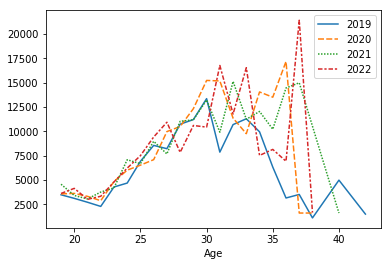

In [56]:
sns.lineplot(data = AgeSal)

In [57]:
stat[stat['Year'] == 2022].sort_values('PTS', ascending = False)['Player_x'].head(10)

3044              Joel Embiid
3211             LeBron James
2843    Giannis Antetokounmpo
3035             Kevin Durant
3668               Trae Young
3015              Luka Dončić
3003            DeMar DeRozan
3375                Ja Morant
3199             Kyrie Irving
3235             Nikola Jokić
Name: Player_x, dtype: object

In [58]:
stat['Salary'] = stat['Annual Salary']
stat['FGeff'] = stat['eFG%']
stat['Perc_3PT'] = stat['3P%']
stat['Perc_2PT'] = stat['2P%']
stat['Perc_FT'] = stat['FT%']
stat['Salary'].round(decimals = 0)
stat.drop('Annual Salary', axis = 1, inplace = True)
stat.drop('3P%', axis = 1, inplace = True)
stat.drop('2P%', axis = 1, inplace = True)
stat.drop('FT%', axis = 1, inplace = True)
stat.drop('eFG%', axis = 1, inplace = True)
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Salary,FGeff,Perc_3PT,Perc_2PT,Perc_FT
689,1,Álex Abrines,Guard,25.0,OKC,31.0,2.0,19.0,5.1,0.357,...,0.2,0.5,1.7,5.3,2019.0,5455.236,0.487,0.323,0.500,0.923
691,3,Jaylen Adams,Guard,22.0,ATL,34.0,1.0,12.6,3.2,0.345,...,0.1,0.8,1.3,3.2,2019.0,270.014,0.459,0.338,0.361,0.778
692,4,Steven Adams,Center,25.0,OKC,80.0,80.0,33.4,10.1,0.595,...,1.0,1.7,2.6,13.9,2019.0,24157.303,0.595,0.000,0.596,0.500
693,5,Bam Adebayo,Center,21.0,MIA,82.0,28.0,23.3,5.9,0.576,...,0.8,1.5,2.5,8.9,2019.0,2955.840,0.579,0.200,0.588,0.735
696,8,LaMarcus Aldridge,Center,33.0,SAS,81.0,81.0,33.2,16.3,0.519,...,1.3,1.8,2.2,21.3,2019.0,22347.015,0.522,0.238,0.528,0.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,597,Delon Wright,Guard,29.0,ATL,77.0,8.0,18.9,3.5,0.454,...,0.2,0.6,0.7,4.4,2022.0,8526.316,0.535,0.379,0.510,0.857
3665,601,Thaddeus Young,Forward,33.0,TOT,52.0,1.0,16.3,5.2,0.518,...,0.3,1.0,1.6,6.2,2022.0,14190.000,0.550,0.354,0.554,0.469
3668,602,Trae Young,Guard,23.0,ATL,76.0,76.0,34.9,20.3,0.460,...,0.1,4.0,1.7,28.4,2022.0,8326.471,0.536,0.382,0.512,0.904
3669,603,Omer Yurtseven,Center,23.0,MIA,56.0,12.0,12.6,4.4,0.526,...,0.4,0.7,1.5,5.3,2022.0,1489.065,0.528,0.091,0.547,0.623


In [59]:
import statsmodels.formula.api as smf

results = smf.ols('Salary ~ Age + Perc_3PT + Perc_2PT', data = stat).fit()
print(results.summary())

AttributeError: module 'pandas' has no attribute 'Panel'

<h1> Clustering

In [60]:
stat.columns

Index(['Rk', 'Player_x', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FGA', 'FG%',
       '3PA', '2PA', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Year', 'Salary', 'FGeff', 'Perc_3PT', 'Perc_2PT',
       'Perc_FT'],
      dtype='object')

In [61]:
cluster_off = stat[['PTS', 'AST', 'ORB', 'TOV']].copy()
cluster_def = stat[['STL', 'BLK', 'DRB']].copy()
cluster_def

,STL,BLK,DRB
689,0.5,0.2,1.4
691,0.4,0.1,1.4
692,1.5,1.0,4.6
693,0.9,0.8,5.3
696,0.5,1.3,6.1
...,...,...,...
3658,1.2,0.2,2.2
3665,1.0,0.3,2.5
3668,0.9,0.1,3.1
3669,0.3,0.4,3.7


<h2> Data scaling

In [62]:
import sklearn.preprocessing as skl

scaler = skl.MinMaxScaler()
cluster_off_scaled = (scaler.fit(cluster_off)) 
cluster_off_scaled = (scaler.transform(cluster_off))

#Min max scaler was used to scale all variables to perform clustering

In [63]:
cluster_def_scaled = (scaler.fit(cluster_def))
cluster_def_scaled = (scaler.transform(cluster_def))

In [64]:
cols_off = cluster_off.columns
offensive_cluster = pd.DataFrame(cluster_off_scaled, columns = cols_off)
cols_def = cluster_def.columns
defensive_cluster = pd.DataFrame(cluster_def_scaled, columns = cols_def)

In [65]:
offensive_cluster

,PTS,AST,ORB,TOV
0,0.146814,0.051282,0.037037,0.10
1,0.088643,0.162393,0.055556,0.16
2,0.385042,0.136752,0.907407,0.34
3,0.246537,0.188034,0.370370,0.30
4,0.590028,0.205128,0.574074,0.36
...,...,...,...,...
1828,0.121884,0.205128,0.111111,0.12
1829,0.171745,0.170940,0.277778,0.20
1830,0.786704,0.829060,0.129630,0.80
1831,0.146814,0.076923,0.277778,0.14


In [66]:
defensive_cluster

,STL,BLK,DRB
0,0.227273,0.058824,0.122807
1,0.181818,0.029412,0.122807
2,0.681818,0.294118,0.403509
3,0.409091,0.235294,0.464912
4,0.227273,0.382353,0.535088
...,...,...,...
1828,0.545455,0.058824,0.192982
1829,0.454545,0.088235,0.219298
1830,0.409091,0.029412,0.271930
1831,0.136364,0.117647,0.324561


<h2> KMeans

<h3> Offensive cluster

In [67]:
from sklearn.cluster import KMeans

ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(offensive_cluster)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

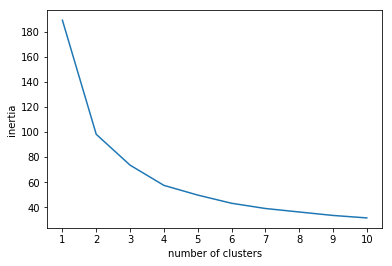

In [68]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [69]:
offensive_k2 = KMeans(n_clusters = 2, random_state = 0)

In [70]:
offensive_cluster_copy = offensive_cluster.copy()
offensive_k2.fit(offensive_cluster)

KMeans(n_clusters=2, random_state=0)

In [71]:
offensive_cluster['Cluster_off'] = offensive_k2.labels_
offensive_cluster

,PTS,AST,ORB,TOV,Cluster_off
0,0.146814,0.051282,0.037037,0.10,0
1,0.088643,0.162393,0.055556,0.16,0
2,0.385042,0.136752,0.907407,0.34,1
3,0.246537,0.188034,0.370370,0.30,0
4,0.590028,0.205128,0.574074,0.36,1
...,...,...,...,...,...
1828,0.121884,0.205128,0.111111,0.12,0
1829,0.171745,0.170940,0.277778,0.20,0
1830,0.786704,0.829060,0.129630,0.80,1
1831,0.146814,0.076923,0.277778,0.14,0


In [72]:
offensive_cluster.groupby(['Cluster_off']).describe().transpose()

Cluster_off            0           1
PTS count    1384.000000  449.000000
    mean        0.192074    0.503551
    std         0.097677    0.148642
    min         0.000000    0.000000
    25%         0.119114    0.404432
    50%         0.182825    0.487535
    75%         0.254848    0.587258
    max         0.554017    1.000000
AST count    1384.000000  449.000000
    mean        0.117101    0.386557
    std         0.077120    0.174196
    min         0.000000    0.068376
    25%         0.059829    0.247863
    50%         0.102564    0.367521
    75%         0.162393    0.495726
    max         0.427350    1.000000
ORB count    1384.000000  449.000000
    mean        0.149941    0.222882
    std         0.123503    0.174939
    min         0.000000    0.037037
    25%         0.055556    0.111111
    50%         0.111111    0.166667
    75%         0.203704    0.277778
    max         0.759259    1.000000
TOV count    1384.000000  449.000000
    mean        0.163642    0.468552
    std         0.077994    0.149505
    min         0.000000    0.240000
    25%         0.100000    0.360000
    50%         0.160000    0.440000
    75%         0.220000    0.560000
    max         0.440000    1.000000

<h3> Defensive cluster

In [73]:
ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(defensive_cluster)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

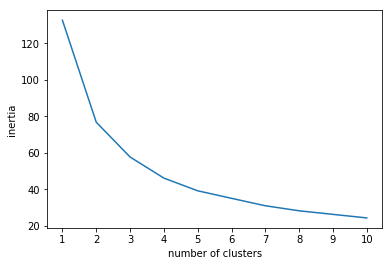

In [74]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [75]:
defensive_k2 = KMeans(n_clusters = 2, random_state = 0)

In [76]:
defensive_cluster_copy = defensive_cluster.copy()
defensive_k2.fit(defensive_cluster)

KMeans(n_clusters=2, random_state=0)

In [77]:
defensive_cluster['Cluster_def'] = defensive_k2.labels_
defensive_cluster

,STL,BLK,DRB,Cluster_def
0,0.227273,0.058824,0.122807,0
1,0.181818,0.029412,0.122807,0
2,0.681818,0.294118,0.403509,1
3,0.409091,0.235294,0.464912,1
4,0.227273,0.382353,0.535088,1
...,...,...,...,...
1828,0.545455,0.058824,0.192982,1
1829,0.454545,0.088235,0.219298,1
1830,0.409091,0.029412,0.271930,1
1831,0.136364,0.117647,0.324561,0


In [78]:
defensive_cluster.groupby(['Cluster_def']).describe().transpose()

Cluster_def            0           1
STL count    1138.000000  695.000000
    mean        0.206463    0.467299
    std         0.105753    0.154523
    min         0.000000    0.136364
    25%         0.136364    0.363636
    50%         0.227273    0.454545
    75%         0.272727    0.545455
    max         0.500000    1.000000
BLK count    1138.000000  695.000000
    mean        0.084901    0.199873
    std         0.074282    0.144023
    min         0.000000    0.000000
    25%         0.029412    0.117647
    50%         0.058824    0.147059
    75%         0.117647    0.264706
    max         0.411765    1.000000
DRB count    1138.000000  695.000000
    mean        0.184773    0.404443
    std         0.086780    0.162197
    min         0.000000    0.070175
    25%         0.122807    0.289474
    50%         0.175439    0.359649
    75%         0.245614    0.486842
    max         0.438596    1.000000

In [79]:
defensive_cluster.isna().sum()

STL            0
BLK            0
DRB            0
Cluster_def    0
dtype: int64

In [80]:
#Add both clusters into the main DataFrame
stat.reset_index(inplace = True)
stat['Cluster_off'] = offensive_cluster['Cluster_off'].astype(str)
stat['Cluster_def'] = defensive_cluster['Cluster_def'].astype(str)

In [81]:
#Creating the combine clusters

stat['Clusters'] = offensive_cluster['Cluster_off'].astype(str) + defensive_cluster['Cluster_def'].astype(str)
stat

,index,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FGA,...,PTS,Year,Salary,FGeff,Perc_3PT,Perc_2PT,Perc_FT,Cluster_off,Cluster_def,Clusters
0,689,1,Álex Abrines,Guard,25.0,OKC,31.0,2.0,19.0,5.1,...,5.3,2019.0,5455.236,0.487,0.323,0.500,0.923,0,0,00
1,691,3,Jaylen Adams,Guard,22.0,ATL,34.0,1.0,12.6,3.2,...,3.2,2019.0,270.014,0.459,0.338,0.361,0.778,0,0,00
2,692,4,Steven Adams,Center,25.0,OKC,80.0,80.0,33.4,10.1,...,13.9,2019.0,24157.303,0.595,0.000,0.596,0.500,1,1,11
3,693,5,Bam Adebayo,Center,21.0,MIA,82.0,28.0,23.3,5.9,...,8.9,2019.0,2955.840,0.579,0.200,0.588,0.735,0,1,01
4,696,8,LaMarcus Aldridge,Center,33.0,SAS,81.0,81.0,33.2,16.3,...,21.3,2019.0,22347.015,0.522,0.238,0.528,0.847,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,3658,597,Delon Wright,Guard,29.0,ATL,77.0,8.0,18.9,3.5,...,4.4,2022.0,8526.316,0.535,0.379,0.510,0.857,0,1,01
1829,3665,601,Thaddeus Young,Forward,33.0,TOT,52.0,1.0,16.3,5.2,...,6.2,2022.0,14190.000,0.550,0.354,0.554,0.469,0,1,01
1830,3668,602,Trae Young,Guard,23.0,ATL,76.0,76.0,34.9,20.3,...,28.4,2022.0,8326.471,0.536,0.382,0.512,0.904,1,1,11
1831,3669,603,Omer Yurtseven,Center,23.0,MIA,56.0,12.0,12.6,4.4,...,5.3,2022.0,1489.065,0.528,0.091,0.547,0.623,0,0,00


In [82]:
round(stat.groupby('Clusters').mean(),2)

,index,Age,G,GS,MP,FGA,FG%,3PA,2PA,FTA,...,BLK,TOV,PF,PTS,Year,Salary,FGeff,Perc_3PT,Perc_2PT,Perc_FT
Clusters,,,,,,,,,,,,,,,,,,,,,
00,2128.57,25.71,44.14,10.45,15.93,5.05,0.44,2.20,2.85,1.09,...,0.29,0.72,1.47,6.04,2020.49,3685.78,0.51,0.31,0.51,0.74
01,2136.58,26.24,58.50,33.85,24.98,7.82,0.48,2.95,4.87,1.90,...,0.72,1.12,2.25,9.86,2020.53,7494.01,0.55,0.32,0.55,0.73
10,2157.68,26.87,56.94,38.13,28.96,12.91,0.43,5.24,7.66,3.21,...,0.24,2.10,1.97,15.90,2020.53,10299.92,0.51,0.36,0.49,0.83
11,2148.02,26.26,60.44,55.43,31.93,14.44,0.47,4.73,9.72,4.23,...,0.64,2.39,2.39,18.66,2020.54,18123.29,0.53,0.34,0.52,0.79


In [83]:
stat[stat['Clusters'] == '11']['Player_x'].value_counts().tail(50)

Zion Williamson            1
Jalen Suggs                1
Josh Giddey                1
Cole Anthony               1
Desmond Bane               1
Alperen Şengün             1
Kevin Porter Jr.           1
Scottie Barnes             1
Théo Maledon               1
Miles Bridges              1
Jakob Poeltl               1
Wendell Carter Jr.         1
Evan Mobley                1
Cade Cunningham            1
Tyler Herro                1
Luguentz Dort              1
Saddiq Bey                 1
Enes Freedom               1
Killian Hayes              1
Darren Collison            1
Carmelo Anthony            1
Dwyane Wade                1
Bruce Brown                1
Klay Thompson              1
Alec Burks                 1
Jeff Teague                1
Dennis Smith Jr.           1
Devonte' Graham            1
Rajon Rondo                1
Kevin Huerter              1
Serge Ibaka                1
Lauri Markkanen            1
Marcus Morris              1
Shabazz Napier             1
Kelly Oubre Jr

<h2> Cluster's graph analysis

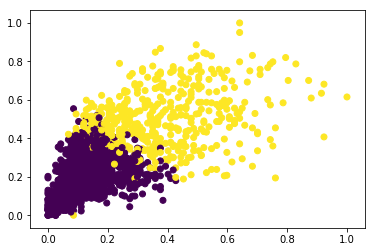

In [84]:
xs_off = offensive_cluster.iloc[:,1] #assists
ys_off = offensive_cluster.iloc[:,0] #points
zs_off = offensive_cluster.iloc[:,4] #cluster
plt.scatter(xs_off,ys_off, c = zs_off)

In [99]:
graph_off = stat[['PTS', 'AST', 'ORB', 'TOV', 'Cluster_off']].copy()
graph_off['Offensive cluster'] = graph_off['Cluster_off']

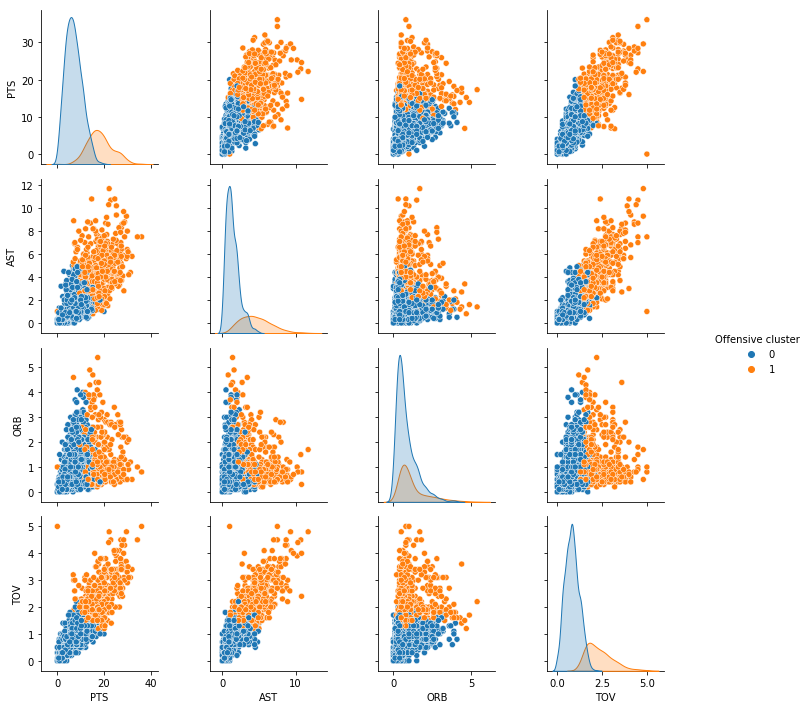

In [113]:
sns.pairplot(graph_off, hue = 'Offensive cluster', kind = 'scatter')

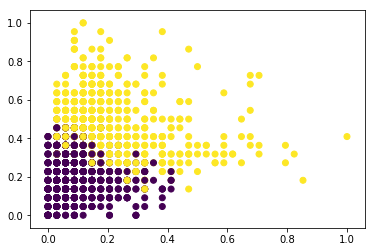

In [87]:
xs_def = defensive_cluster.iloc[:,1] #Blocks
ys_def = defensive_cluster.iloc[:,0] #Steals
zs_def = defensive_cluster.iloc[:,3] #cluster
plt.scatter(xs_def,ys_def, c = zs_def)

In [97]:
graph_def = stat[['STL', 'BLK', 'DRB', 'Cluster_def']].copy()
graph_def['Defensive cluster'] = graph_def['Cluster_def']

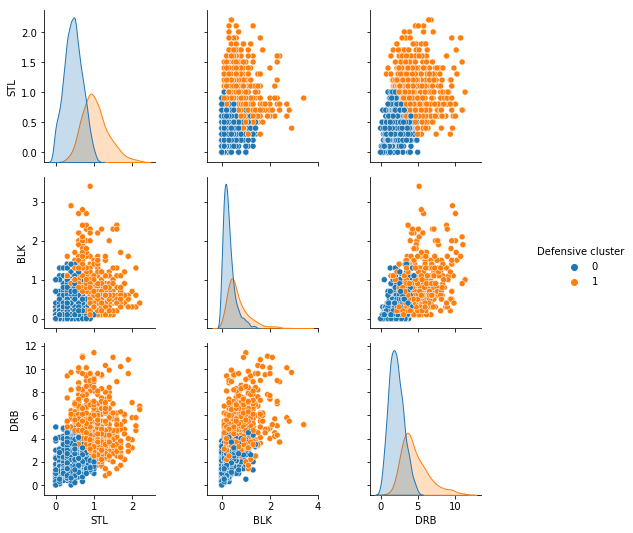

In [98]:
sns.pairplot(graph_def, hue = 'Defensive cluster', kind = 'scatter'  )

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


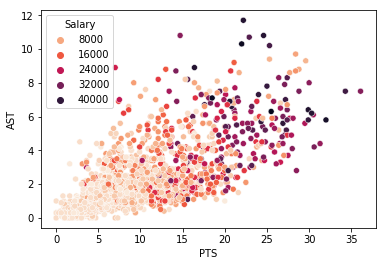

In [105]:
xs = stat.iloc[:,22] #pontos
ys = stat.iloc[:,17] #Assits
zs = stat.iloc[:,24] #salary
sns.scatterplot(xs,ys, hue = zs, palette = 'rocket_r', legend = 'brief')


In [94]:
round(stat[['PTS','AST','DRB','TOV', 'STL', 'BLK', 'ORB', 'Salary']].groupby(stat['Clusters']).mean(),2)

,PTS,AST,DRB,TOV,STL,BLK,ORB,Salary
Clusters,,,,,,,,
00,6.04,1.22,2.06,0.72,0.44,0.29,0.65,3685.78
01,9.86,1.86,3.99,1.12,0.94,0.72,1.32,7494.01
10,15.90,4.04,2.74,2.10,0.67,0.24,0.61,10299.92
11,18.66,4.62,5.15,2.39,1.10,0.64,1.33,18123.29


In [102]:
stat['Clusters'].value_counts()

00    1060
11     371
01     324
10      78
Name: Clusters, dtype: int64

In [103]:
stat.columns

Index(['index', 'Rk', 'Player_x', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FGA',
       'FG%', '3PA', '2PA', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year', 'Salary', 'FGeff', 'Perc_3PT', 'Perc_2PT',
       'Perc_FT', 'Cluster_off', 'Cluster_def', 'Clusters'],
      dtype='object')

/Users/diogoliladar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


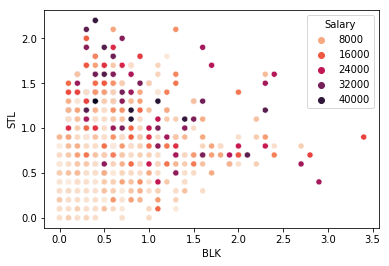

In [112]:
xs_ = stat.iloc[:,19] #Blocos
ys_ = stat.iloc[:,18] #Steals
zs_ = stat.iloc[:,24] #salary
sns.scatterplot(xs_,ys_, hue = zs_, palette = 'rocket_r', legend = 'brief')